In [5]:
import yfinance as yf
import pandas as pd
import umap.umap_ as umap
from matplotlib import pyplot as plt


class Data_Load:
    def __init__(self, stocks_number):
        if stocks_number<=0:
            raise ValueError("stocks_number must be positive!")
        self.stocks_number = stocks_number
        
    @staticmethod
    def ticker_list(stocks_number,path='C:/Users/egoro/Downloads/nasdaq_screener_1632564628104.csv'):
        frame=pd.read_csv(path, delimiter=',')
        frame=frame[frame['IPO Year']<=2016].reset_index(drop=True)
        tickers=list(frame.iloc[:,0])
        
        sum_None=0
        j=0
        for t in tickers[j:]:
            ticker = yf.Ticker(t)
            if ticker.info['regularMarketPrice']==None:
                sum_None=sum_None+1
                continue
            else: j=j+1
            if j==stocks_number: break  
        tickers_new=tickers[:j+sum_None]
        tickers_new=tickers_new+['SPY']
        return tickers_new

    def __call__(self,interval, start='2021-08-03',end='2021-08-03'):
        df_list = list()
        for ticker in Data_Load.ticker_list(self.stocks_number):
            data = yf.download(ticker, interval=interval, start=start, end=end,  group_by="Ticker")
            data['ticker'] = ticker  
            df_list.append(data)
        df = pd.concat(df_list)
        df = df.dropna()
        return df

        

# Набор данных с дневной частотностью

In [7]:
frame=pd.read_csv('C:/Users/egoro/Downloads/nasdaq_screener_1632564628104.csv', delimiter=',')
stocks_number=50
p=Data_Load(stocks_number)

In [8]:
df_days=p(interval='1d', start='2021-06-02',end='2021-09-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df_days_new=df_days.merge(frame.rename({'Symbol': 'ticker'}, axis=1), on='ticker', how='left')
df_days_new=df_days_new.drop(['Last Sale','Net Change','% Change','Market Cap','IPO Year','Volume_y'],axis=1)
df_days_new.loc[df_days_new['ticker'] == 'SPY', 'Name'] = 'SPY'

# Набор данных с часовой частотностью

In [28]:
df_hours=p(interval='1h', start='2021-07-02',end='2021-09-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [29]:
df_hours_new=df_hours.merge(frame.rename({'Symbol': 'ticker'}, axis=1), on='ticker', how='left')
df_hours_new=df_hours_new.drop(['Last Sale','Net Change','% Change','Market Cap','IPO Year','Volume_y'],axis=1)
df_hours_new.loc[df_hours_new['ticker'] == 'SPY', 'Name'] = 'SPY'

In [30]:
df_hours_new

Open        High         Low       Close   Adj Close   Volume_x  \
0      149.050003  149.300003  149.000000  149.270004  149.270004  1445095.0   
1      148.070007  148.610001  147.279999  147.925003  147.925003   429826.0   
2      147.910004  148.235001  147.539993  148.139999  148.139999   145032.0   
3      148.179993  148.604996  148.009995  148.529999  148.529999   126663.0   
4      148.514999  148.729996  148.479996  148.500000  148.500000    83504.0   
...           ...         ...         ...         ...         ...        ...   
11293  452.649994  453.049988  452.595001  452.980011  452.980011  3755346.0   
11294  452.975006  453.109985  452.649994  452.709991  452.709991  3579854.0   
11295  452.709991  452.709991  451.899994  452.149994  452.149994  6221859.0   
11296  452.149994  452.200012  451.545013  451.809998  451.809998  8100043.0   
11297  435.135010  435.135010  435.135010  435.135010  435.135010        0.0   

      ticker                                    Name        Country  \
0          A  Agilent Technologies Inc. Common Stock  United States   
1          A  Agilent Technologies Inc. Common Stock  United States   
2          A  Agilent Technologies Inc. Common Stock  United States   
3          A  Agilent Technologies Inc. Common Stock  United States   
4          A  Agilent Technologies Inc. Common Stock  United States   
...      ...                                     ...            ...   
11293    SPY                                     SPY            NaN   
11294    SPY                                     SPY            NaN   
11295    SPY                                     SPY            NaN   
11296    SPY                                     SPY            NaN   
11297    SPY                                     SPY            NaN   

              Sector             Industry  
0      Capital Goods  Electrical Products  
1      Capital Goods  Electrical Products  
2      Capital Goods  Electrical Products  
3      Capital Goods  Electrical Products  
4      Capital Goods  Electrical Products  
...              ...                  ...  
11293            NaN                  NaN  
11294            NaN                  NaN  
11295            NaN                  NaN  
11296            NaN                  NaN  
11297            NaN                  NaN  

[11298 rows x 11 columns]

# Набор данных с недельной частотностью

In [31]:
df_week=p(interval='1wk', start='2016-09-02',end='2021-09-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [32]:
df_week_new=df_week.merge(frame.rename({'Symbol': 'ticker'}, axis=1), on='ticker', how='left')
df_week_new=df_week_new.drop(['Last Sale','Net Change','% Change','Market Cap','IPO Year','Volume_y'],axis=1)
df_week_new.loc[df_week_new['ticker'] == 'SPY', 'Name'] = 'SPY'

In [33]:
df_week_new

Open        High         Low       Close   Adj Close  \
0       47.029999   47.389999   46.810001   47.000000   44.966507   
1       46.900002   47.169998   44.869999   44.880001   42.938236   
2       44.590000   45.810001   44.470001   44.790001   42.852127   
3       44.900002   46.869999   44.860001   46.610001   44.593380   
4       46.459999   47.320000   46.139999   47.090000   45.052608   
...           ...         ...         ...         ...         ...   
13347  440.339996  442.940002  436.100006  442.489990  442.489990   
13348  442.459991  445.940002  441.309998  445.920013  445.920013   
13349  444.529999  447.109985  436.119995  443.359985  443.359985   
13350  445.160004  450.649994  443.440002  450.250000  450.250000   
13351  450.970001  453.109985  450.709991  451.799988  451.799988   

           Volume_x ticker                                    Name  \
0      2.682400e+06      A  Agilent Technologies Inc. Common Stock   
1      6.395000e+06      A  Agilent Technologies Inc. Common Stock   
2      1.122890e+07      A  Agilent Technologies Inc. Common Stock   
3      9.136900e+06      A  Agilent Technologies Inc. Common Stock   
4      9.421200e+06      A  Agilent Technologies Inc. Common Stock   
...             ...    ...                                     ...   
13347  1.336642e+10    SPY                                     SPY   
13348  2.065146e+10    SPY                                     SPY   
13349  4.195878e+10    SPY                                     SPY   
13350  2.688011e+10    SPY                                     SPY   
13351  1.563257e+10    SPY                                     SPY   

             Country         Sector             Industry  
0      United States  Capital Goods  Electrical Products  
1      United States  Capital Goods  Electrical Products  
2      United States  Capital Goods  Electrical Products  
3      United States  Capital Goods  Electrical Products  
4      United States  Capital Goods  Electrical Products  
...              ...            ...                  ...  
13347            NaN            NaN                  NaN  
13348            NaN            NaN                  NaN  
13349            NaN            NaN                  NaN  
13350            NaN            NaN                  NaN  
13351            NaN            NaN                  NaN  

[13352 rows x 11 columns]

# Подотовка данных(недельные)

In [34]:
new_stocks_number=stocks_number
names=df_week_new['Name'].unique()
for name in names:
    if sum(df_week_new['Name']==name)!=round(df_week_new.shape[0]/(new_stocks_number+1),0):
        df_week_new=df_week_new[df_week_new['Name']!=name].reset_index(drop=True)
        new_stocks_number=new_stocks_number-1

In [35]:
import numpy as np
df_exp_week=pd.DataFrame(np.reshape(np.array(df_week_new['Adj Close']),(int(round(df_week_new.shape[0]/(new_stocks_number+1),0)),new_stocks_number+1),order='F'), columns=df_week_new['Name'].unique())

In [36]:
df_log_returns_week=df_exp_week.copy()
columns=df_log_returns_week.columns
for column in columns:
    df_log_returns_week[column]=np.log(df_log_returns_week[column]).diff()
    df_log_returns_week=df_log_returns_week.dropna()

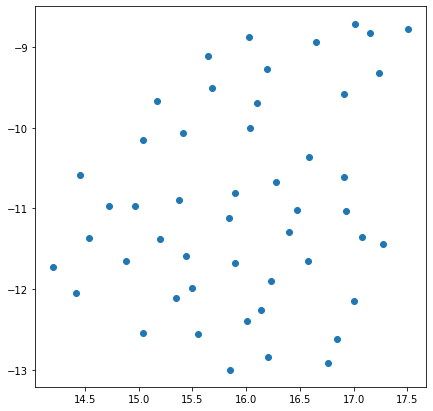

In [44]:
um = umap.UMAP()
standard_embedding = um.fit_transform(df_log_returns_week.transpose())
plt.figure(figsize = (7, 7))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1])
plt.show()

# Подотовка данных(дневные)

In [10]:
new_stocks_number=stocks_number
names=df_days_new['Name'].unique()
for name in names:
    if sum(df_days_new['Name']==name)!=round(df_days_new.shape[0]/(new_stocks_number+1),0):
        df_days_new=df_days_new[df_days_new['Name']!=name].reset_index(drop=True)
        new_stocks_number=new_stocks_number-1

In [12]:
df_exp_days=pd.DataFrame(np.reshape(np.array(df_days_new['Adj Close']),
                                    (int(round(df_days_new.shape[0]/(new_stocks_number+1),0)),new_stocks_number+1),order='F'),
                         columns=df_days_new['Name'].unique())

In [13]:
df_log_returns_days=df_exp_days.copy()
columns=df_log_returns_days.columns
for column in columns:
    df_log_returns_days[column]=np.log(df_log_returns_days[column]).diff()
    df_log_returns_days=df_log_returns_days.dropna()

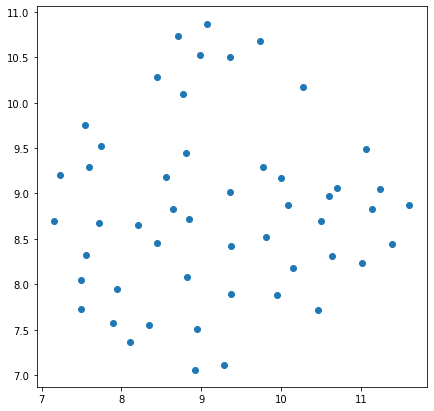

In [27]:
um = umap.UMAP()
standard_embedding = um.fit_transform(df_log_returns_days.transpose())
plt.figure(figsize = (7, 7))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], cmap='Spectral')
plt.show()

# Подотовка данных(часовые)

In [37]:
new_stocks_number=stocks_number
names=df_hours_new['Name'].unique()
for name in names:
    if sum(df_hours_new['Name']==name)!=round(df_hours_new.shape[0]/(new_stocks_number+1),0):
        df_hours_new=df_hours_new[df_hours_new['Name']!=name].reset_index(drop=True)
        new_stocks_number=new_stocks_number-1

In [38]:
df_exp_hours=pd.DataFrame(np.reshape(np.array(df_hours_new['Adj Close']),
                                    (int(round(df_hours_new.shape[0]/(new_stocks_number+1),0)),new_stocks_number+1),order='F'),
                         columns=df_hours_new['Name'].unique())

In [39]:
df_log_returns_hours=df_exp_hours.copy()
columns=df_log_returns_hours.columns
for column in columns:
    df_log_returns_hours[column]=np.log(df_log_returns_hours[column]).diff()
    df_log_returns_hours=df_log_returns_hours.dropna()

D:\Anaconda\envs\forTF\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


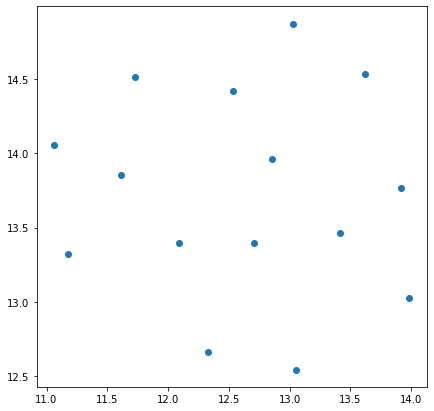

In [43]:
um = umap.UMAP()
standard_embedding = um.fit_transform(df_log_returns_hours.transpose())
plt.figure(figsize = (7, 7))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1])
plt.show()

# KMeans

In [45]:
n_clusters=4
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row)
        ax[index].set_title(f"{_}")
        plt.xticks(rotation=45)

    plt.show()

# Недельные данные

In [46]:
from sklearn.cluster import KMeans
import numpy as np

corr_matrix=df_log_returns_week.corr()
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans =kmeans.fit(corr_matrix)
clusters = {
    i: corr_matrix.columns[np.where(kmeans.labels_ == i)[0]].tolist()
    for i in np.unique(kmeans.labels_)
}

In [47]:
clusters

{0: ['Alcoa Corporation Common Stock ',
  'American Assets Trust Inc. Common Stock',
  'Ameris Bancorp Common Stock',
  'Asbury Automotive Group Inc Common Stock',
  'Arbor Realty Trust Common Stock',
  'Allegiance Bancshares Inc. Common Stock',
  'American Campus Communities Inc Common Stock',
  'AECOM Common Stock',
  'Accenture plc Class A Ordinary Shares (Ireland)',
  'Aberdeen Income Credit Strategies Fund Common Shares',
  'Ares Commercial Real Estate Corporation Common Stock',
  'Virtus AllianzGI Diversified Income & Convertible Fund Common Shares of Beneficial Interest',
  'Alliance Data Systems Corporation Common Stock',
  'Advanced Energy Industries Inc. Common Stock',
  'American Equity Investment Life Holding Company Common Stock',
  'AerCap Holdings N.V. Ordinary Shares',
  'Apollo Senior Floating Rate Fund Inc. Common Stock',
  'Aberdeen Global Dynamic Dividend Fund',
  'SPY'],
 1: ['Applied Optoelectronics Inc. Common Stock',
  'ACADIA Pharmaceuticals Inc. Common Stock',

                          Cluster number: 0


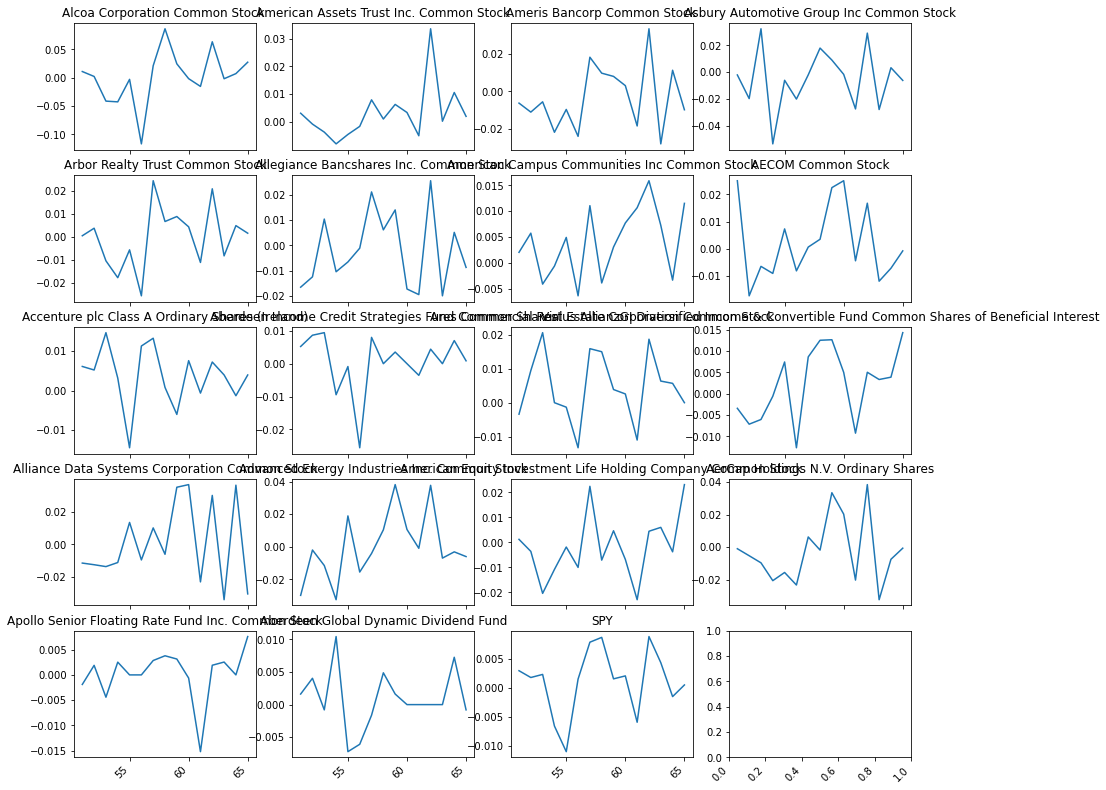

                          Cluster number: 1


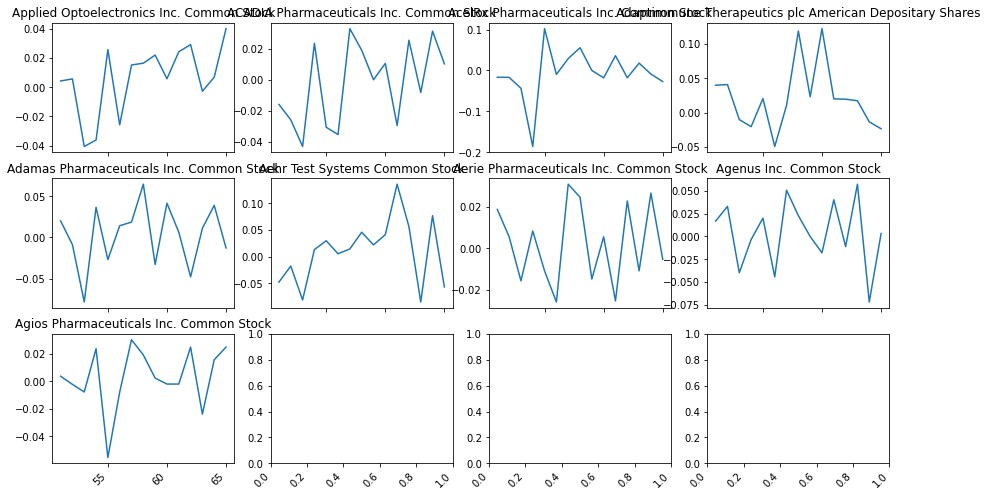

                          Cluster number: 2


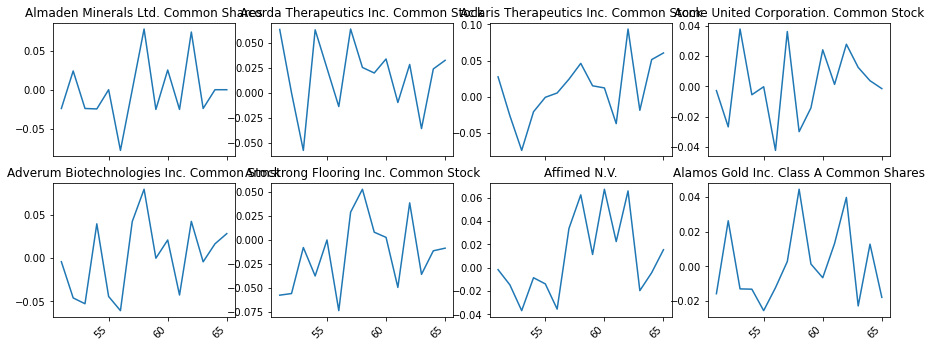

                          Cluster number: 3


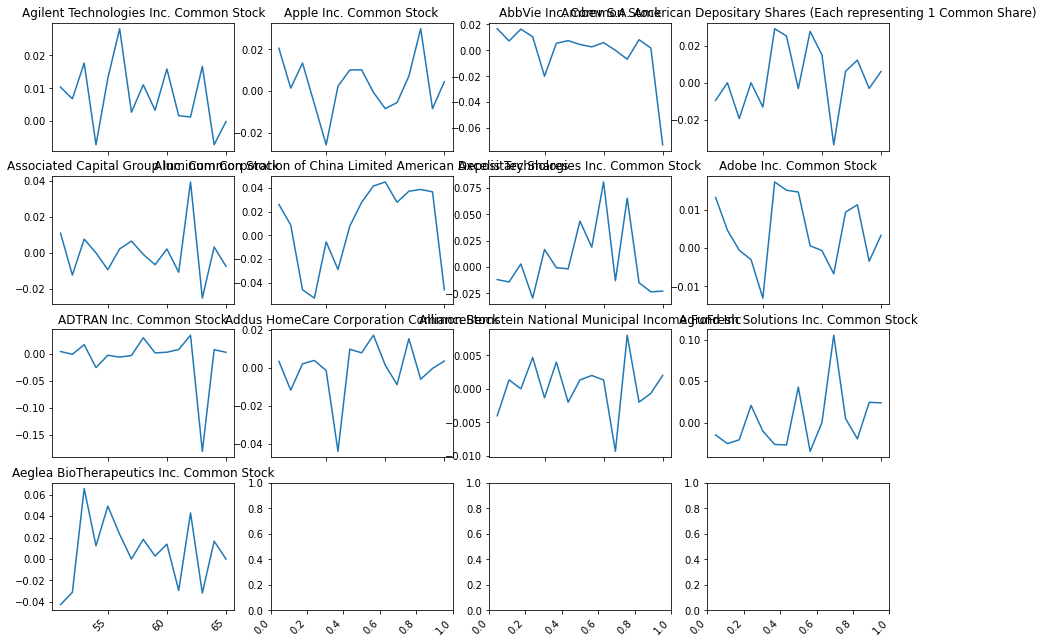

In [48]:
import matplotlib.pyplot as plt
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_days[clusters[cluster]].T)

# Дневные данные

In [49]:
from sklearn.cluster import KMeans
import numpy as np

corr_matrix=df_log_returns_days.corr()
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans =kmeans.fit(corr_matrix)
clusters = {
    i: corr_matrix.columns[np.where(kmeans.labels_ == i)[0]].tolist()
    for i in np.unique(kmeans.labels_)
}

In [50]:
clusters

{0: ['Agilent Technologies Inc. Common Stock',
  'Apple Inc. Common Stock',
  'AbbVie Inc. Common Stock',
  'AC Immune SA Common Stock',
  'Accenture plc Class A Ordinary Shares (Ireland)',
  'Adobe Inc. Common Stock',
  'Adamas Pharmaceuticals Inc. Common Stock',
  'Aberdeen Global Dynamic Dividend Fund',
  'Agenus Inc. Common Stock',
  'AgroFresh Solutions Inc. Common Stock'],
 1: ['Applied Optoelectronics Inc. Common Stock',
  'American Campus Communities Inc Common Stock',
  'Aluminum Corporation of China Limited American Depositary Shares',
  'Axcelis Technologies Inc. Common Stock',
  'AECOM Common Stock',
  'Acorda Therapeutics Inc. Common Stock',
  'Aberdeen Income Credit Strategies Fund Common Shares',
  'AcelRx Pharmaceuticals Inc. Common Stock',
  'Adaptimmune Therapeutics plc American Depositary Shares',
  'Alliance Data Systems Corporation Common Stock',
  'ADTRAN Inc. Common Stock',
  'Aehr Test Systems Common Stock',
  'Advanced Energy Industries Inc. Common Stock'],
 2:

                          Cluster number: 0


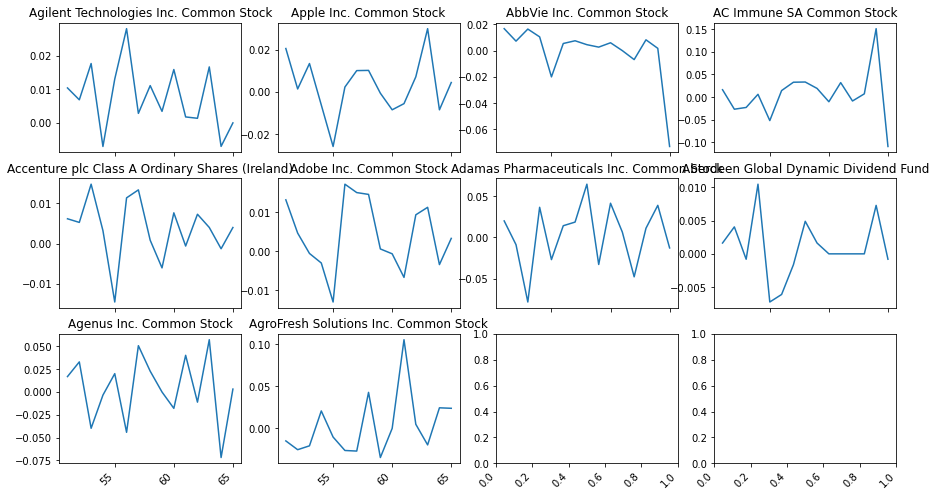

                          Cluster number: 1


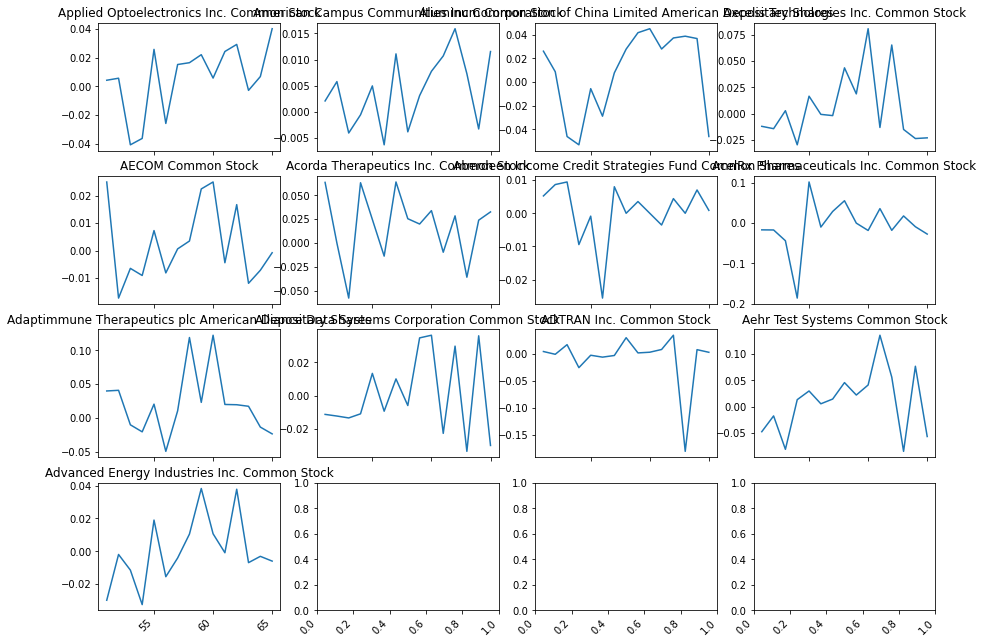

                          Cluster number: 2


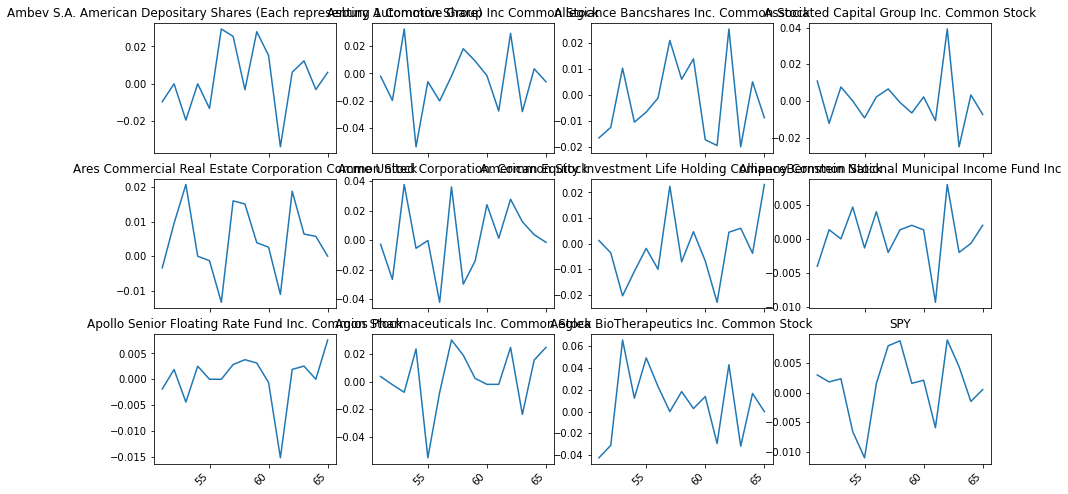

                          Cluster number: 3


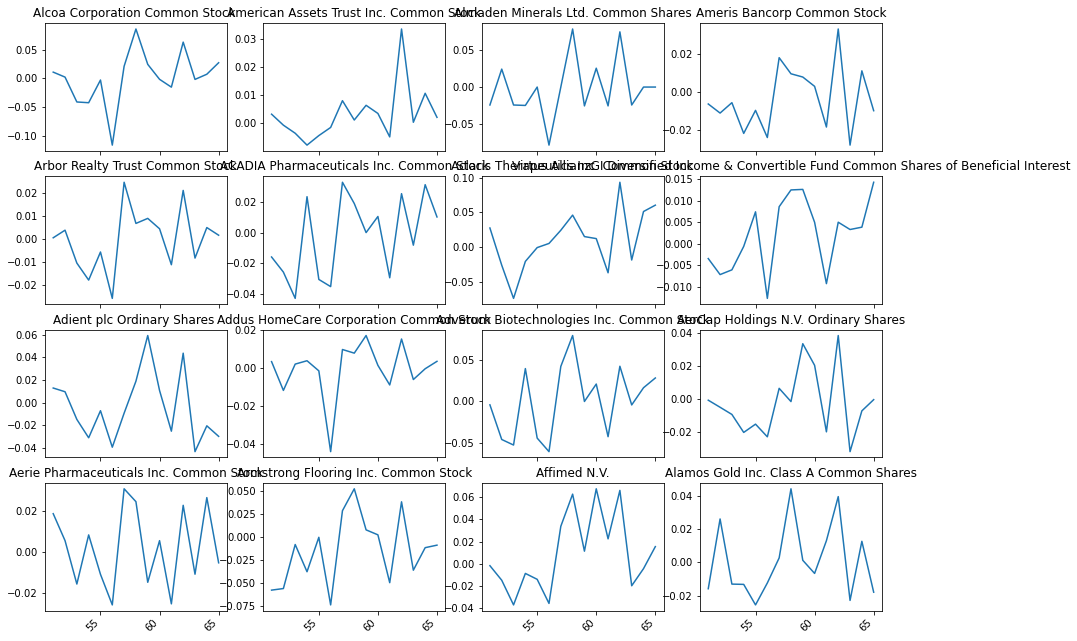

In [51]:
import matplotlib.pyplot as plt
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_days[clusters[cluster]].T)

# Часовые данные

In [52]:
from sklearn.cluster import KMeans
import numpy as np

corr_matrix=df_log_returns_hours.corr()
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans =kmeans.fit(corr_matrix)
clusters = {
    i: corr_matrix.columns[np.where(kmeans.labels_ == i)[0]].tolist()
    for i in np.unique(kmeans.labels_)
}

Вывод: реализован класс, позволяющий задавать время, интервал и количество акций для загрузки. В трех временных интервалах был протестирован kmeans. Для часовых данных было взято меньше активов, так как многие из них имеют пропуски. На начальном этапе все активы с пропусками были отброшены, в дальнейшем можно воспользоваться интерполяцией. Пока трудно сделать выводы по тому, какой временной интервал предпочтителен, так как kmeans нестабилен. Для его стабилизации лучше использовтаь некую метрику качества и прогонять алгоритм N раз с разным количеством кластеров с целью оптимизации данной метрики. Такой метрикой может служить силуэт. Необходимы дальнейшие исследования.
В качестве аналога биткоина в данной работе загружается индекс SPY.

                          Cluster number: 0


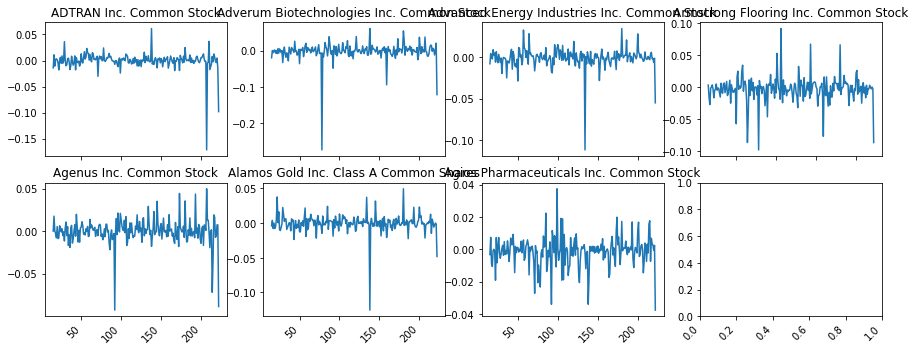

                          Cluster number: 1


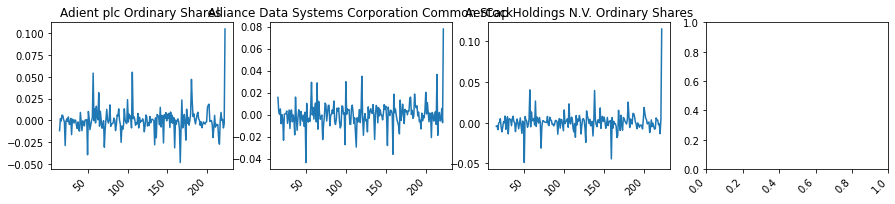

                          Cluster number: 2


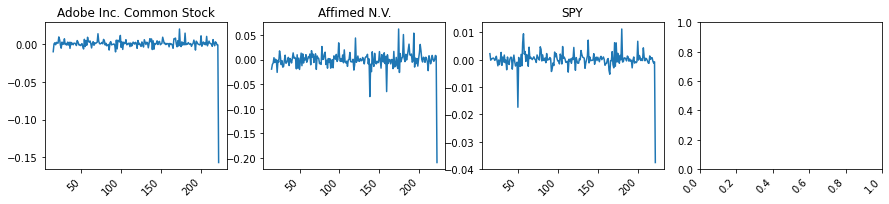

                          Cluster number: 3


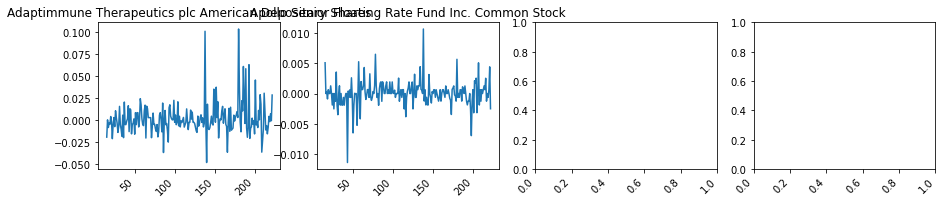

In [53]:
import matplotlib.pyplot as plt
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_hours[clusters[cluster]].T)

# Генерируем фичи

Кластеризацию будем проводить на матрице дистанций по корреляции доходностей. Количество кластеров отбирается из условия того, что средняя корреляция в получившихся кластерах максимальная. Почему не силуэт? Метрика силуэта работать не будет, так как она не имеет смысла, когда в кластере может быть один актив.

# Часовые данные

In [54]:
window=70
df_train = df_log_returns_hours[:-window]
df_test = df_log_returns_hours[-window:]

In [55]:
import plotly.express as px
fig = px.line(df_train, x=df_train.index, y=df_train.columns,)

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)
fig.show()

In [56]:
corr_matrix = pd.DataFrame(df_train.corr(),
                                       index=df_train.columns,
                                       columns=df_train.columns)
dist_matrix = ((1 - (corr_matrix.fillna(0))) / 2.0) ** .5

In [57]:
kmeans, avg_ = None, 0
for num_clusters in range(2, df_train.shape[1]//2):
        kmeans_ = KMeans(n_clusters=num_clusters, init='k-means++')
        kmeans_ = kmeans_.fit(dist_matrix)
        clusters = {
                    i: corr_matrix.columns[np.where(kmeans_.labels_ == i)[0]].tolist()
                    for i in np.unique(kmeans_.labels_)
                }
        clu = list(clusters.values())
        for cluster in clu:
            correlation = pd.DataFrame(df_train[cluster].corr(),index=df_train.columns,
                                       columns=df_train.columns)
            dist_corr = ((1 - (correlation.fillna(0))) / 2.0) ** .5
            avg = dist_corr.sum().sum()/(dist_corr.shape[1]*dist_corr.shape[1]-dist_corr.shape[1])
        avg_mean=np.mean(avg)
        if avg_mean>=avg_:
                avg_=avg_mean
                clusters_itog=clusters
        print(avg_,num_clusters,avg_mean )
print(clusters_itog)

0.6869975425826267 2 0.6869975425826267
0.7398807220491834 3 0.7398807220491834
0.7398807220491834 4 0.7398807220491834
0.7398807220491834 5 0.7362189618958078
0.7497557632333255 6 0.7497557632333255
{0: ['Affimed N.V.', 'Agenus Inc. Common Stock', 'Alamos Gold Inc. Class A Common Shares', 'Agios Pharmaceuticals Inc. Common Stock'], 1: ['Adient plc Ordinary Shares ', 'Alliance Data Systems Corporation Common Stock', 'Advanced Energy Industries Inc. Common Stock', 'AerCap Holdings N.V. Ordinary Shares', 'SPY'], 2: ['Adobe Inc. Common Stock'], 3: ['Adverum Biotechnologies Inc. Common Stock', 'Armstrong Flooring Inc. Common Stock'], 4: ['Adaptimmune Therapeutics plc American Depositary Shares'], 5: ['ADTRAN Inc. Common Stock', 'Apollo Senior Floating Rate Fund Inc. Common Stock']}


In [58]:
for key, value in clusters_itog.items():
    print("{0}: {1}".format(key,value))

0: ['Affimed N.V.', 'Agenus Inc. Common Stock', 'Alamos Gold Inc. Class A Common Shares', 'Agios Pharmaceuticals Inc. Common Stock']
1: ['Adient plc Ordinary Shares ', 'Alliance Data Systems Corporation Common Stock', 'Advanced Energy Industries Inc. Common Stock', 'AerCap Holdings N.V. Ordinary Shares', 'SPY']
2: ['Adobe Inc. Common Stock']
3: ['Adverum Biotechnologies Inc. Common Stock', 'Armstrong Flooring Inc. Common Stock']
4: ['Adaptimmune Therapeutics plc American Depositary Shares']
5: ['ADTRAN Inc. Common Stock', 'Apollo Senior Floating Rate Fund Inc. Common Stock']


                          Cluster number: 0


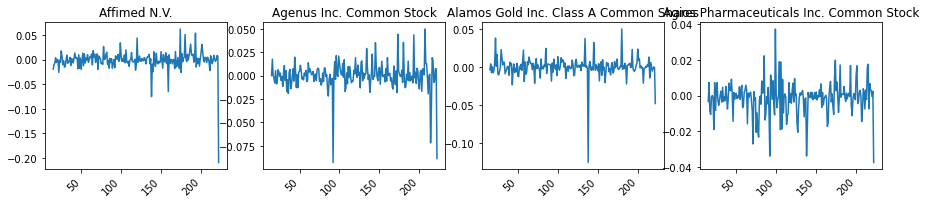

                          Cluster number: 1


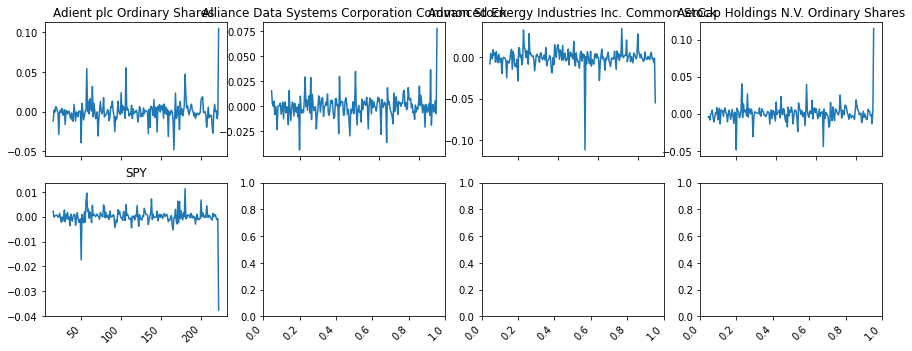

                          Cluster number: 2


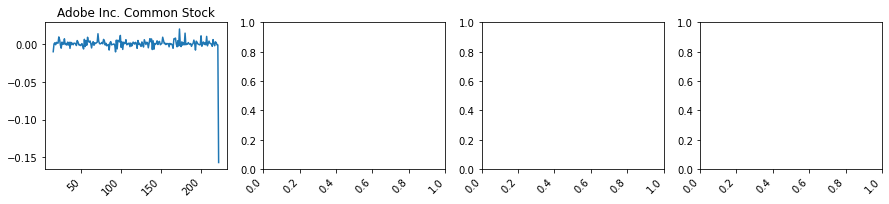

                          Cluster number: 3


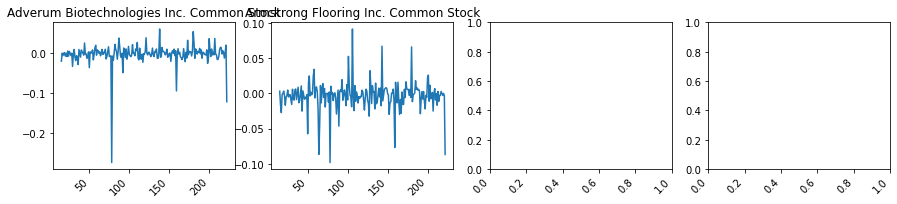

                          Cluster number: 4


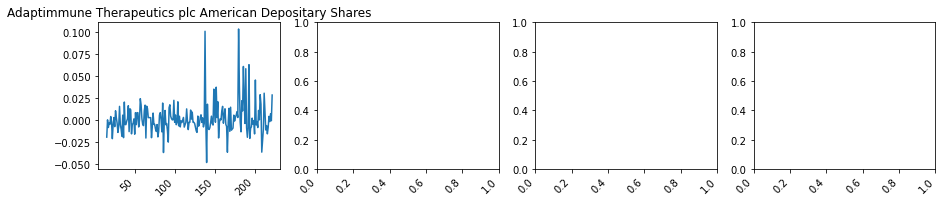

In [59]:
import matplotlib.pyplot as plt
for cluster in range(5):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_hours[clusters_itog[cluster]].T)

In [60]:
def get_key(value):
    for k, v in clusters_itog.items():
        if v.count(value) > 0:
            return k

In [61]:
df=pd.DataFrame()
df['skew']=df_log_returns_hours.skew()
df['kurtosis']=df_log_returns_hours.kurtosis()
df['Shares']=df.index
df['claster_numb'] = df['Shares'].apply(get_key)

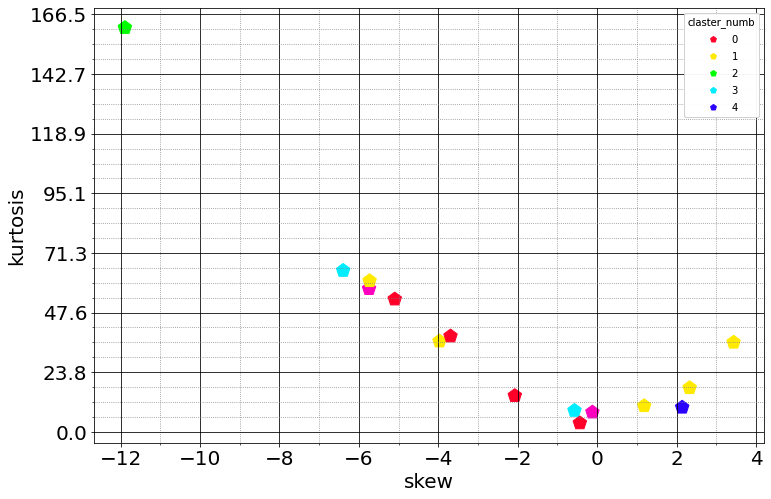

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
#  Устанавливаем интервал основных и
#  вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(max(abs(df['skew']/0.5))))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(max(abs(df['skew']/2))))

ax.tick_params(
    axis='both',  # Применяем параметры к обеим осям
    which='major',  # Применяем параметры к основным делениям
    labelsize=20,  # Длинна делений
)  # Ширина делений
#  Добавляем линии основной сетки:
ax.grid(which='major', color='k')
x = np.array(df['skew'])
y = np.array(df['kurtosis'])
scatter =ax.scatter(x,
           y,
           marker="p",
           c=df.claster_numb,
           s=200,
           cmap="gist_rainbow")
legend1 = ax.legend(*scatter.legend_elements(num=range(0,max(clusters_itog.keys()))),
                    loc="best", title="claster_numb")
ax.add_artist(legend1)
#  Включаем видимость вспомогательных делений:
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor', color='gray', linestyle=':')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.xlabel('skew', fontsize=20)

plt.ylabel('kurtosis', fontsize=20)

plt.show()

Как видно из графика, данная кластеризация не позволила разделить данные по skew и kurtosis 

# Дневные данные

In [63]:
window=5
df_train = df_log_returns_days[:-window]
df_test = df_log_returns_days[-window:]

In [64]:
import plotly.express as px
fig = px.line(df_train, x=df_train.index, y=df_train.columns,)

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)
fig.show()

In [65]:
corr_matrix = pd.DataFrame(df_train.corr(),
                                       index=df_train.columns,
                                       columns=df_train.columns)
dist_matrix = ((1 - (corr_matrix.fillna(0))) / 2.0) ** .5

In [66]:
kmeans, avg_ = None, 0
for num_clusters in range(2, df_train.shape[1]//2):
        kmeans_ = KMeans(n_clusters=num_clusters, init='k-means++')
        kmeans_ = kmeans_.fit(dist_matrix)
        clusters = {
                    i: corr_matrix.columns[np.where(kmeans_.labels_ == i)[0]].tolist()
                    for i in np.unique(kmeans_.labels_)
                }
        clu = list(clusters.values())
        for cluster in clu:
            correlation = pd.DataFrame(df_train[cluster].corr(),index=df_train.columns,
                                       columns=df_train.columns)
            dist_corr = ((1 - (correlation.fillna(0))) / 2.0) ** .5
            avg = dist_corr.sum().sum()/(dist_corr.shape[1]*dist_corr.shape[1]-dist_corr.shape[1])
        avg_mean=np.mean(avg)
        if avg_mean>=avg_:
                avg_=avg_mean
                clusters_itog=clusters
                num_clusters_itog=num_clusters
        print(avg_,num_clusters_itog,avg_mean )
print(clusters_itog)

0.7053840275544311 2 0.7053840275544311
0.7053840275544311 2 0.6705601495515481
0.7069155297582869 4 0.7069155297582869
0.7164286597043975 5 0.7164286597043975
0.7164286597043975 5 0.7076258840014754
0.7174720253537453 7 0.7174720253537453
0.7185546203924111 8 0.7185546203924111
0.7196401568108721 9 0.7196401568108721
0.7196401568108721 10 0.7196401568108721
0.7196401568108721 10 0.7189587745492769
0.7196401568108721 12 0.7196401568108721
0.720971620033342 13 0.720971620033342
0.720971620033342 13 0.7183151604307865
0.720971620033342 13 0.7205168129214783
0.720971620033342 16 0.720971620033342
0.720971620033342 17 0.720971620033342
0.720971620033342 17 0.7204133384168173
0.720971620033342 19 0.720971620033342
0.720971620033342 20 0.720971620033342
0.720971620033342 21 0.720971620033342
0.720971620033342 21 0.7196220457534818
0.720971620033342 21 0.7203351173174974
0.720971620033342 24 0.720971620033342
{0: ['AbbVie Inc. Common Stock', 'Associated Capital Group Inc. Common Stock', 'Acce

In [67]:
for key, value in clusters_itog.items():
    print("{0}: {1}".format(key,value))

0: ['AbbVie Inc. Common Stock', 'Associated Capital Group Inc. Common Stock', 'Accenture plc Class A Ordinary Shares (Ireland)']
1: ['Aclaris Therapeutics Inc. Common Stock']
2: ['Virtus AllianzGI Diversified Income & Convertible Fund Common Shares of Beneficial Interest', 'Addus HomeCare Corporation Common Stock', 'Armstrong Flooring Inc. Common Stock']
3: ['Aeglea BioTherapeutics Inc. Common Stock']
4: ['AECOM Common Stock', 'Alliance Data Systems Corporation Common Stock', 'Advanced Energy Industries Inc. Common Stock']
5: ['AC Immune SA Common Stock', 'Agios Pharmaceuticals Inc. Common Stock']
6: ['ACADIA Pharmaceuticals Inc. Common Stock', 'Adverum Biotechnologies Inc. Common Stock', 'Aerie Pharmaceuticals Inc. Common Stock']
7: ['American Assets Trust Inc. Common Stock', 'Aluminum Corporation of China Limited American Depositary Shares', 'Adient plc Ordinary Shares ', 'AerCap Holdings N.V. Ordinary Shares']
8: ['American Campus Communities Inc Common Stock', 'American Equity Inve

Отметим, что кластеризация показывает неплохие результаты. Например, в 0-м кластере акции Apple, Adobe и индекс SPY,в первом - компании, связанные с финансами. Отметим, что и Apple и Adobe входят в этот индекс SPY. Есть кластеры связанные с медициной. 

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1.4123198986053467 seconds.
K=3 fitted in 1.745396375656128 seconds.
K=4 fitted in 1.9654438495635986 seconds.
K=5 fitted in 2.1724913120269775 seconds.
K=6 fitted in 2.386539936065674 seconds.
K=7 fitted in 2.670604705810547 seconds.
K=8 fitted in 2.83964204788208 seconds.
K=9 fitted in 3.1017026901245117 seconds.
K=10 fitted in 3.3147497177124023 seconds.
K=11 fitted in 3.5117945671081543 seconds.
K=12 fitted in 3.7008376121520996 seconds.
K=13 fitted in 3.9738996028900146 seconds.
K=14 fitted in 4.216954231262207 seconds.
K=15 fitted in 4.447005748748779 seconds.
K=16 fitted in 4.676057577133179 seconds.
K=17 fitted in 4.908111572265625 seconds.
K=18 fitted in 5.148163795471191 seconds.
K=19 fitted in 5.437230825424194 seconds.
K=20 fitted in 5.635276794433594 seconds.
K=21 fitted in 5.86932635307312 seconds.
K=22 fitted in 6.17939829826355 seconds.
K=23 fitted in 6.404449701309204 seconds.
K=24 fitted in 6.631746530532837

Text(0.5, 1.0, 'K-Means (scikit-learn)')

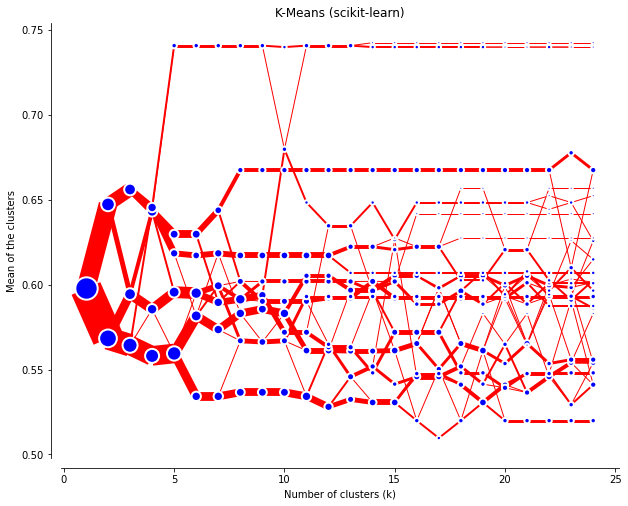

In [68]:
from clustergram import Clustergram

import seaborn as sns
cgram = Clustergram(range(1, df_train.shape[1]//2), n_init=1000)
cgram.fit(dist_matrix)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color='r'),
    cluster_style={"color": 'b'},
pca_weighted=False)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

Кластераграмма показывает перетекание активов. Более толстые линии означают большеее число активов. Это еще один способ выбирать оптимальное число кластеров.

                          Cluster number: 0


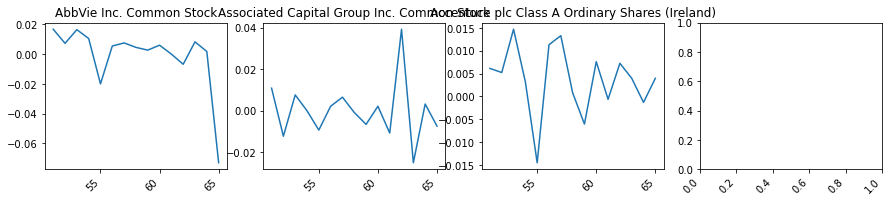

                          Cluster number: 1


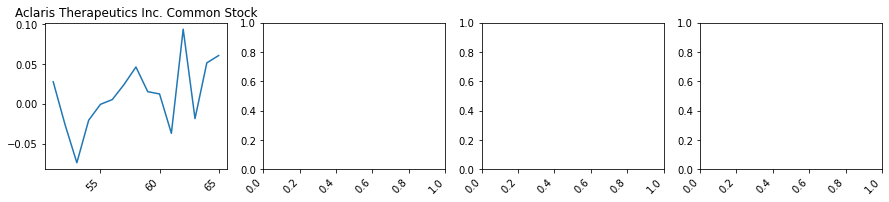

                          Cluster number: 2


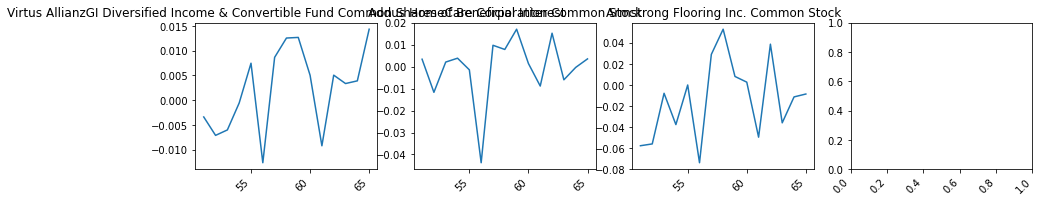

                          Cluster number: 3


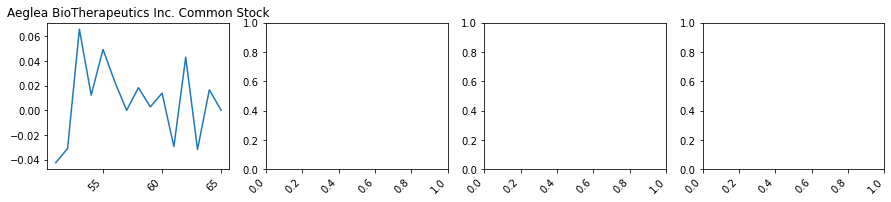

                          Cluster number: 4


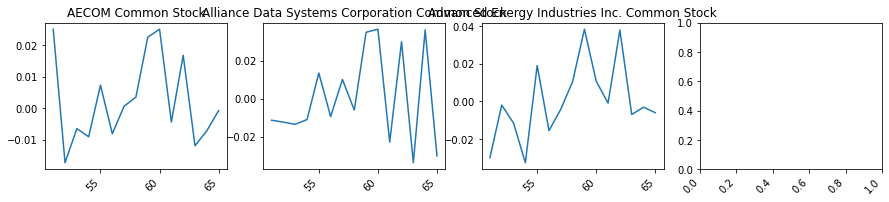

                          Cluster number: 5


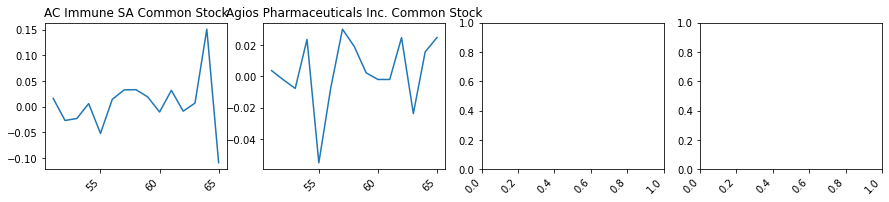

                          Cluster number: 6


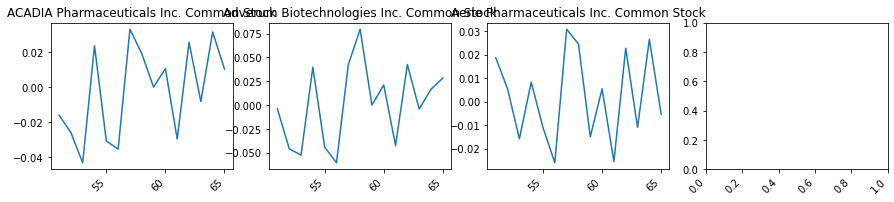

                          Cluster number: 7


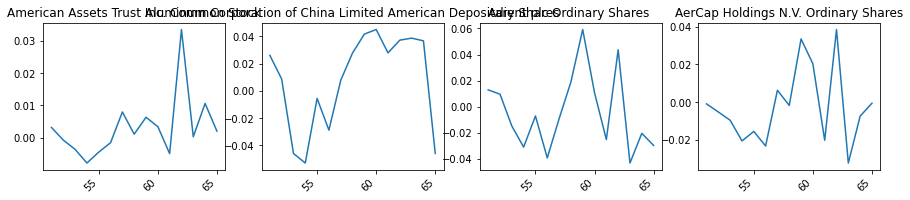

                          Cluster number: 8


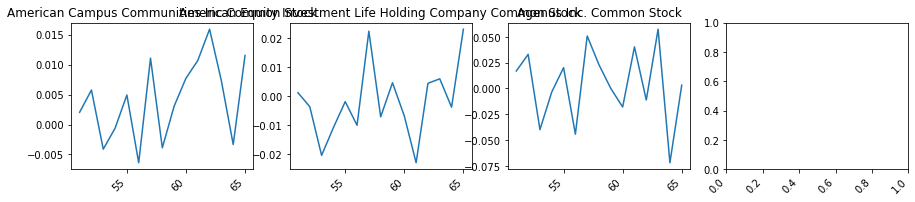

                          Cluster number: 9


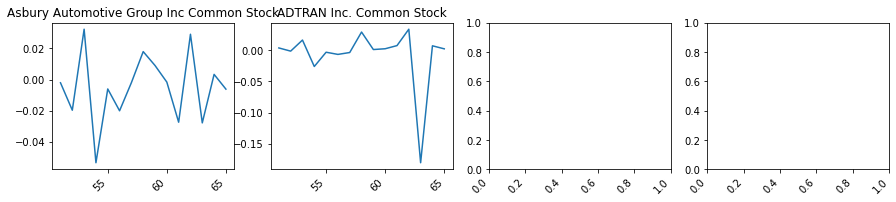

                          Cluster number: 10


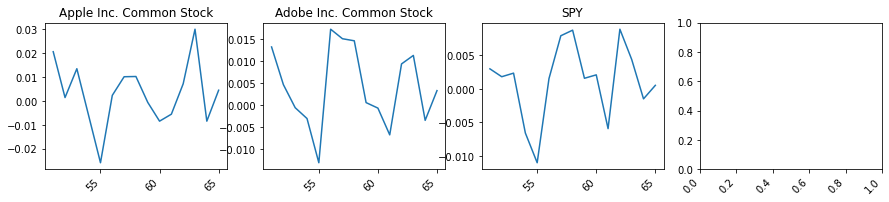

                          Cluster number: 11


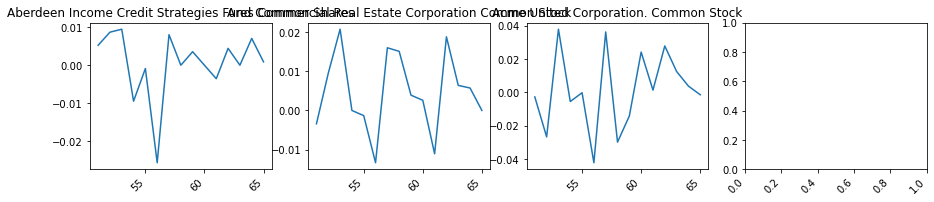

                          Cluster number: 12


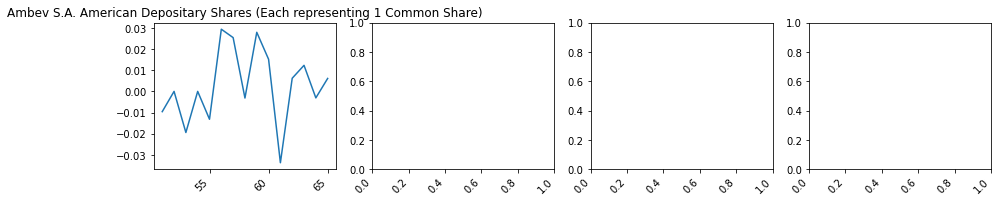

                          Cluster number: 13


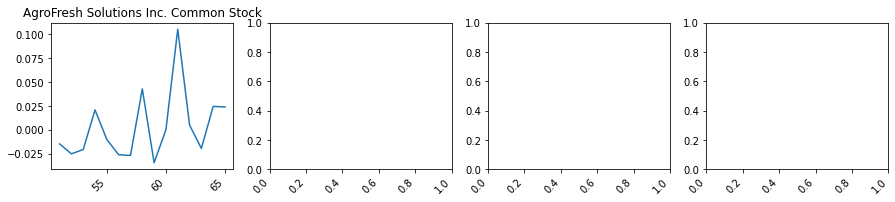

                          Cluster number: 14


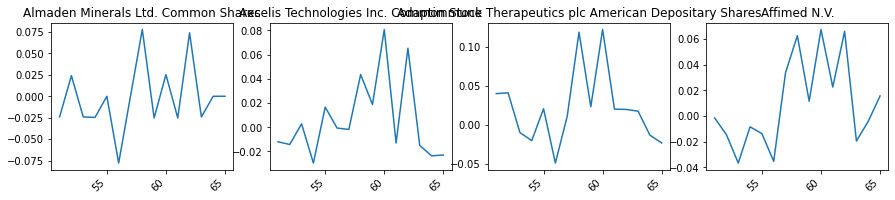

                          Cluster number: 15


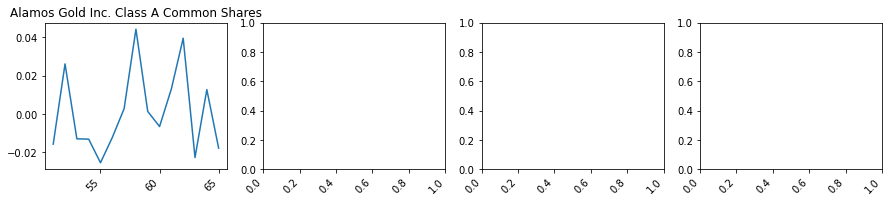

                          Cluster number: 16


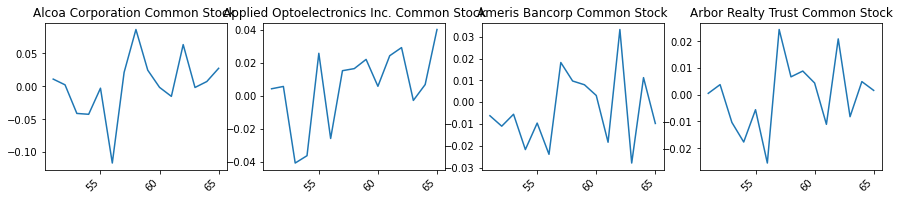

                          Cluster number: 17


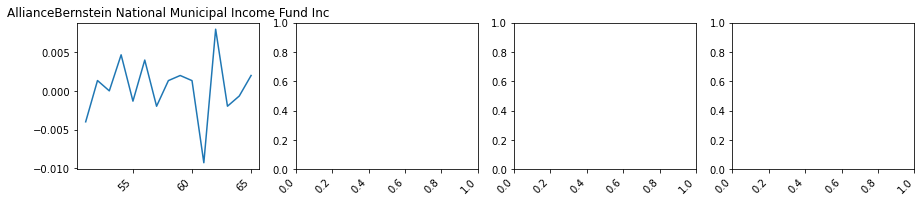

                          Cluster number: 18


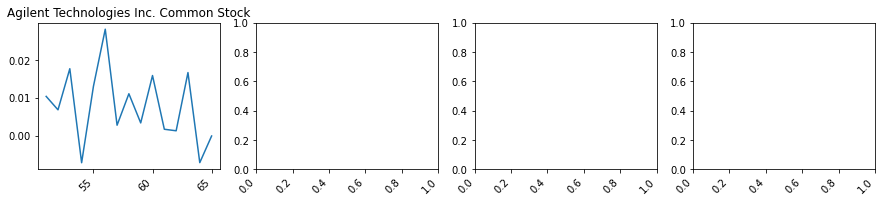

                          Cluster number: 19


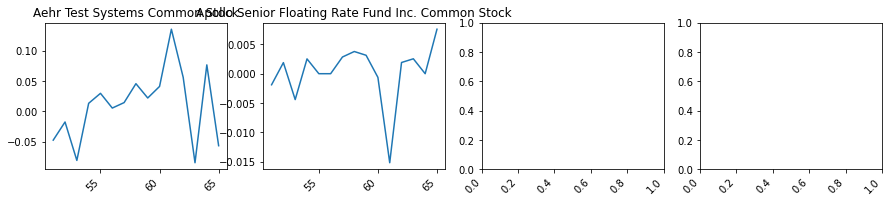

                          Cluster number: 20


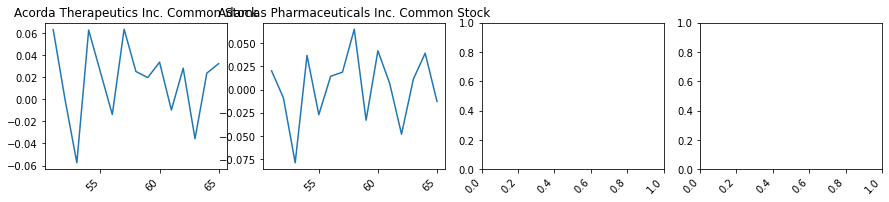

                          Cluster number: 21


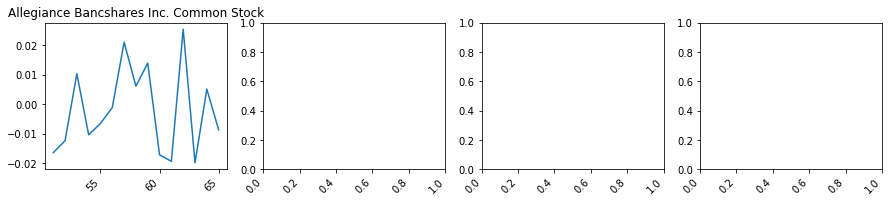

                          Cluster number: 22


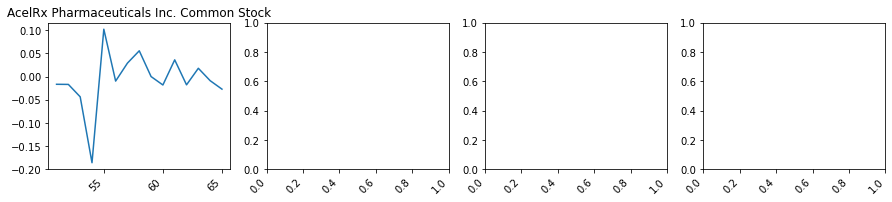

                          Cluster number: 23


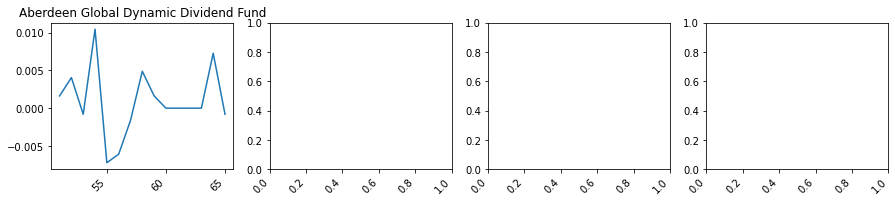

In [69]:
import matplotlib.pyplot as plt
for cluster in range(24):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_days[clusters_itog[cluster]].T)

In [70]:
df=pd.DataFrame()
df['skew']=df_log_returns_days.skew()
df['kurtosis']=df_log_returns_days.kurtosis()
df['Shares']=df.index
df['claster_numb'] = df['Shares'].apply(get_key)

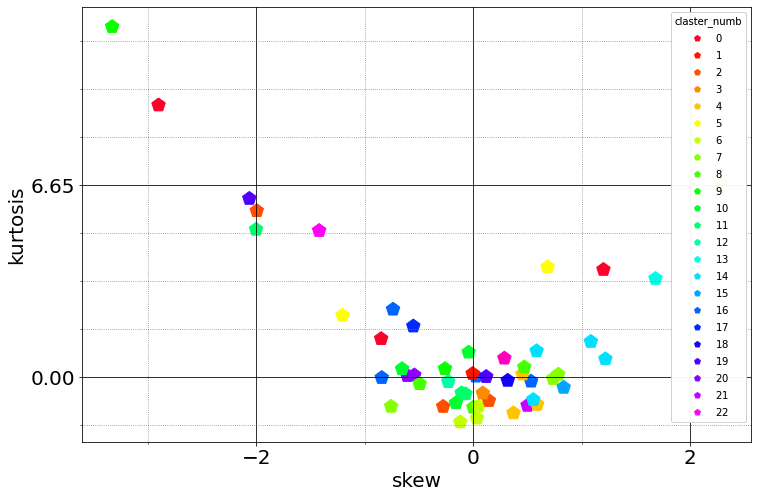

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
#  Устанавливаем интервал основных и
#  вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(max(abs(df['skew']/0.5))))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(max(abs(df['skew']/2))))

ax.tick_params(
    axis='both',  # Применяем параметры к обеим осям
    which='major',  # Применяем параметры к основным делениям
    labelsize=20,  # Длинна делений
)  # Ширина делений
#  Добавляем линии основной сетки:
ax.grid(which='major', color='k')
x = np.array(df['skew'])
y = np.array(df['kurtosis'])
scatter =ax.scatter(x,
           y,
           marker="p",
           c=df.claster_numb,
           s=200,
           cmap="gist_rainbow")
legend1 = ax.legend(*scatter.legend_elements(num=range(0,max(clusters_itog.keys()))),
                    loc="best", title="claster_numb")
ax.add_artist(legend1)
#  Включаем видимость вспомогательных делений:
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor', color='gray', linestyle=':')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.xlabel('skew', fontsize=20)

plt.ylabel('kurtosis', fontsize=20)

plt.show()

# Недельные данные

In [72]:
window=40
df_train = df_log_returns_week[:-window]
df_test = df_log_returns_week[-window:]

In [73]:
corr_matrix = pd.DataFrame(df_train.corr(),
                                       index=df_train.columns,
                                       columns=df_train.columns)
dist_matrix = ((1 - (corr_matrix.fillna(0))) / 2.0) ** .5

In [74]:
kmeans, avg_ = None, 0
for num_clusters in range(2, df_train.shape[1]//2):
        kmeans_ = KMeans(n_clusters=num_clusters, init='k-means++')
        kmeans_ = kmeans_.fit(dist_matrix)
        clusters = {
                    i: corr_matrix.columns[np.where(kmeans_.labels_ == i)[0]].tolist()
                    for i in np.unique(kmeans_.labels_)
                }
        clu = list(clusters.values())
        for cluster in clu:
            correlation = pd.DataFrame(df_train[cluster].corr(),index=df_train.columns,
                                       columns=df_train.columns)
            dist_corr = ((1 - (correlation.fillna(0))) / 2.0) ** .5
            avg = dist_corr.sum().sum()/(dist_corr.shape[1]*dist_corr.shape[1]-dist_corr.shape[1])
        avg_mean=np.mean(avg)
        if avg_mean>=avg_:
                avg_=avg_mean
                clusters_itog=clusters
                num_clusters_itog=num_clusters
        print(avg_,num_clusters_itog,avg_mean )
print(clusters_itog)

0.6591797598803529 2 0.6591797598803529
0.7093320283207213 3 0.7093320283207213
0.7093320283207213 3 0.6904601053561873
0.7155315767071789 5 0.7155315767071789
0.7183873730889151 6 0.7183873730889151
0.7185169165841216 7 0.7185169165841216
0.7185169165841216 7 0.7133872712605575
0.7208037910952637 9 0.7208037910952637
0.7211240869283657 10 0.7211240869283657
0.7211501604488811 11 0.7211501604488811
0.7211501604488811 11 0.7185183607972166
0.7211501604488811 11 0.7211240869283657
0.7215375318230072 14 0.7215375318230072
0.7215375318230072 14 0.7211462719533445
0.7215375318230072 16 0.7215375318230072
0.7215375318230072 17 0.7215375318230072
0.7215375318230072 18 0.7215375318230072
0.7215375318230072 19 0.7215375318230072
0.7215375318230072 19 0.7185183607972166
0.7215375318230072 19 0.7210874064358629
0.7215375318230072 19 0.7210874064358629
0.7215375318230072 23 0.7215375318230072
{0: ['Adaptimmune Therapeutics plc American Depositary Shares', 'Agenus Inc. Common Stock'], 1: ['American

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1.4113209247589111 seconds.
K=3 fitted in 1.6323671340942383 seconds.
K=4 fitted in 1.8504180908203125 seconds.
K=5 fitted in 2.0064544677734375 seconds.
K=6 fitted in 2.215500593185425 seconds.
K=7 fitted in 2.4465622901916504 seconds.
K=8 fitted in 2.7496132850646973 seconds.
K=9 fitted in 2.9186625480651855 seconds.
K=10 fitted in 3.1927218437194824 seconds.
K=11 fitted in 3.454782485961914 seconds.
K=12 fitted in 3.703838348388672 seconds.
K=13 fitted in 3.9528942108154297 seconds.
K=14 fitted in 4.161942005157471 seconds.
K=15 fitted in 4.382991552352905 seconds.
K=16 fitted in 4.625046730041504 seconds.
K=17 fitted in 4.868102312088013 seconds.
K=18 fitted in 5.153165578842163 seconds.
K=19 fitted in 5.312607526779175 seconds.
K=20 fitted in 5.508517026901245 seconds.
K=21 fitted in 5.850322246551514 seconds.
K=22 fitted in 6.128387212753296 seconds.
K=23 fitted in 6.611495733261108 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

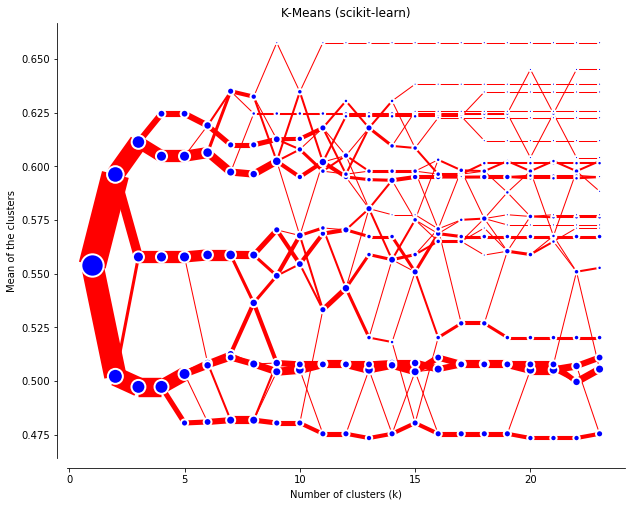

In [75]:
from clustergram import Clustergram

import seaborn as sns
cgram = Clustergram(range(1, df_train.shape[1]//2), n_init=1000)
cgram.fit(dist_matrix)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color='r'),
    cluster_style={"color": 'b'},
pca_weighted=False)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

In [76]:
for key, value in clusters_itog.items():
    print("{0}: {1}".format(key,value))

0: ['Adaptimmune Therapeutics plc American Depositary Shares', 'Agenus Inc. Common Stock']
1: ['American Assets Trust Inc. Common Stock', 'Arbor Realty Trust Common Stock', 'American Campus Communities Inc Common Stock', 'Ares Commercial Real Estate Corporation Common Stock']
2: ['Accenture plc Class A Ordinary Shares (Ireland)', 'Aberdeen Income Credit Strategies Fund Common Shares', 'Virtus AllianzGI Diversified Income & Convertible Fund Common Shares of Beneficial Interest', 'Aberdeen Global Dynamic Dividend Fund', 'SPY']
3: ['Apple Inc. Common Stock', 'AbbVie Inc. Common Stock', 'Adobe Inc. Common Stock']
4: ['Applied Optoelectronics Inc. Common Stock', 'ADTRAN Inc. Common Stock', 'Addus HomeCare Corporation Common Stock', 'AgroFresh Solutions Inc. Common Stock']
5: ['AcelRx Pharmaceuticals Inc. Common Stock', 'Aehr Test Systems Common Stock']
6: ['ACADIA Pharmaceuticals Inc. Common Stock', 'Agios Pharmaceuticals Inc. Common Stock']
7: ['Alamos Gold Inc. Class A Common Shares']
8: 

                          Cluster number: 0


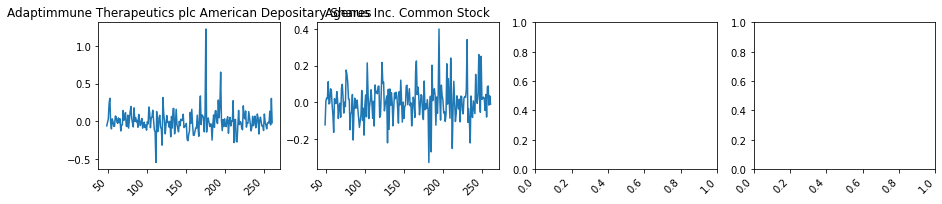

                          Cluster number: 1


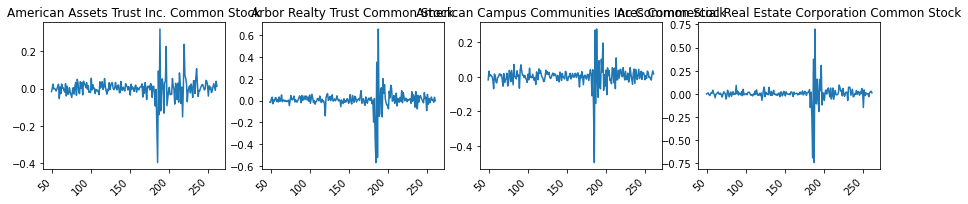

                          Cluster number: 2


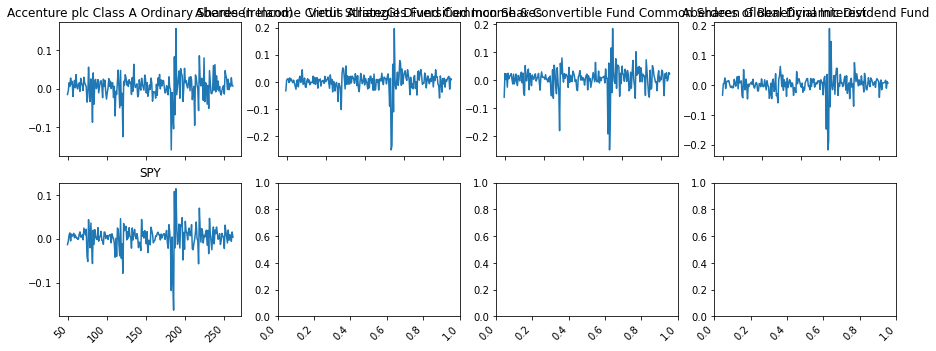

                          Cluster number: 3


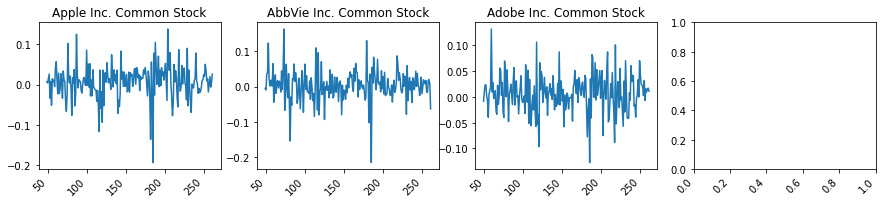

                          Cluster number: 4


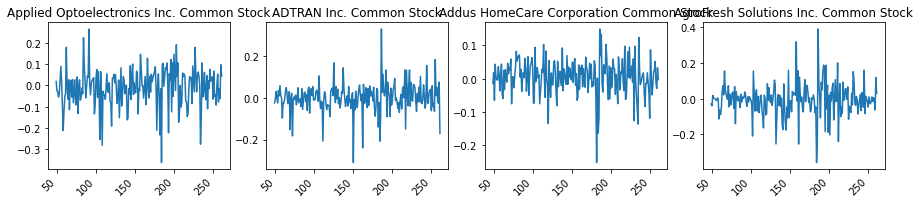

                          Cluster number: 5


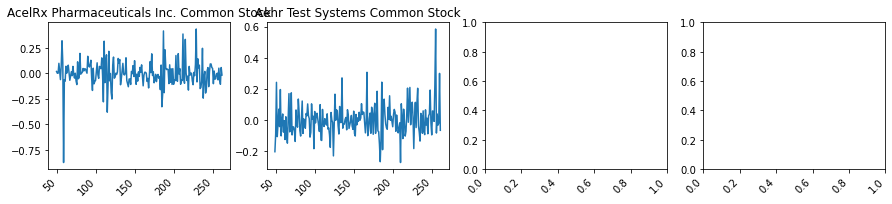

                          Cluster number: 6


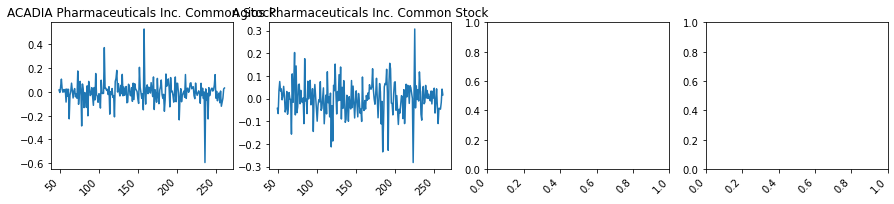

                          Cluster number: 7


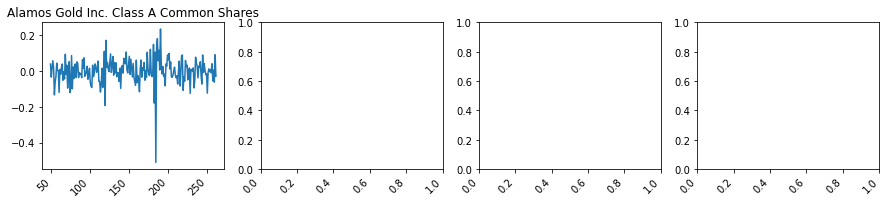

                          Cluster number: 8


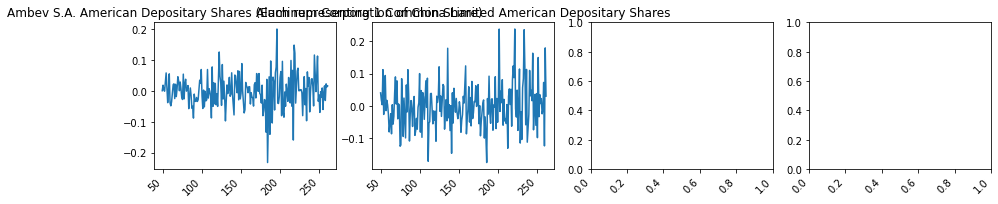

                          Cluster number: 9


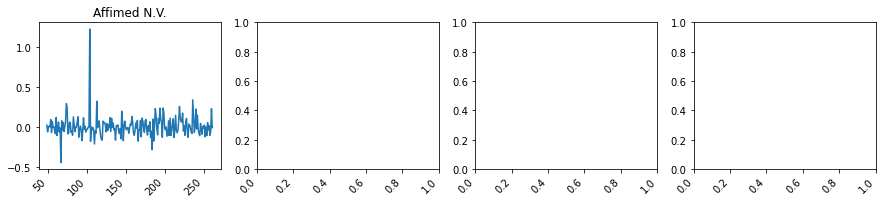

                          Cluster number: 10


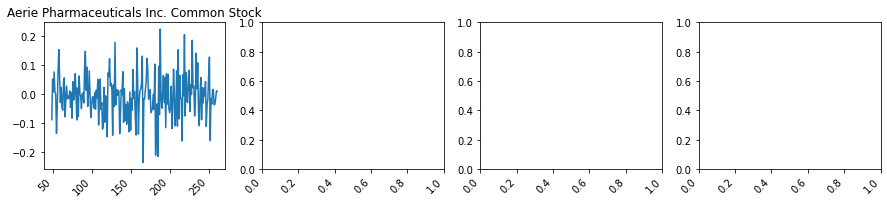

                          Cluster number: 11


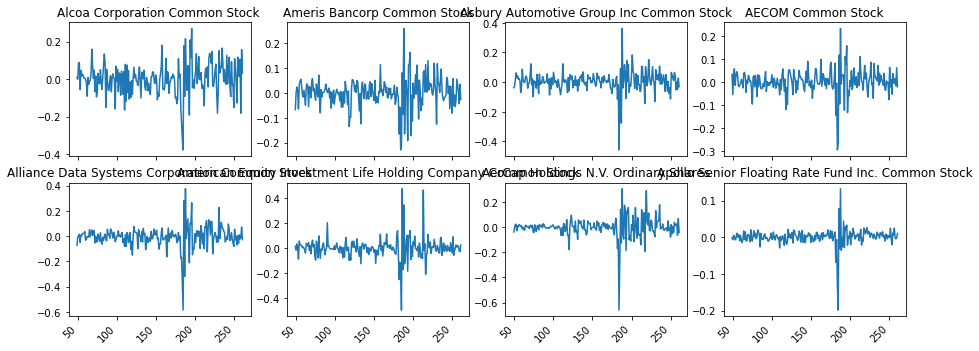

                          Cluster number: 12


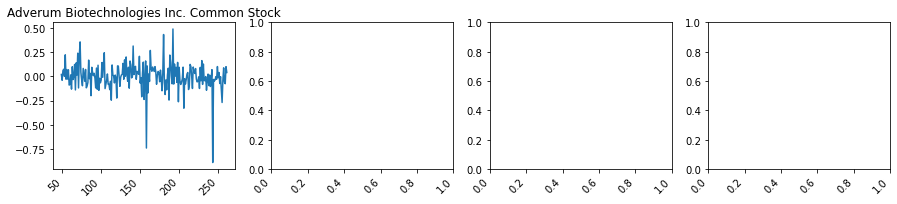

                          Cluster number: 13


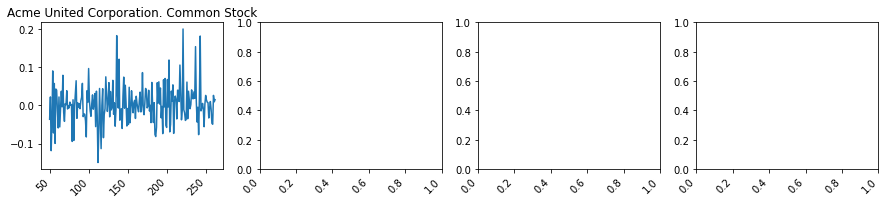

                          Cluster number: 14


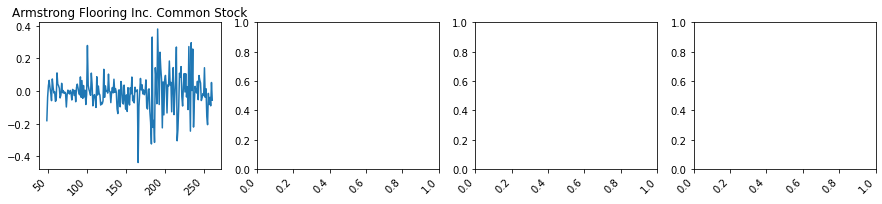

                          Cluster number: 15


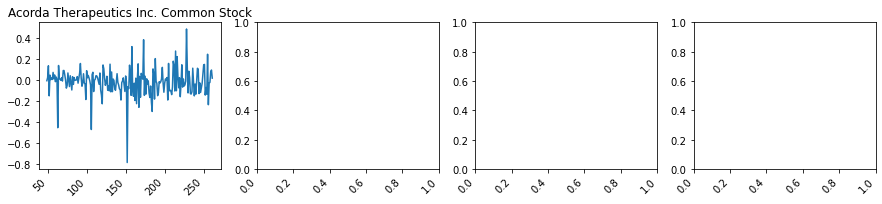

                          Cluster number: 16


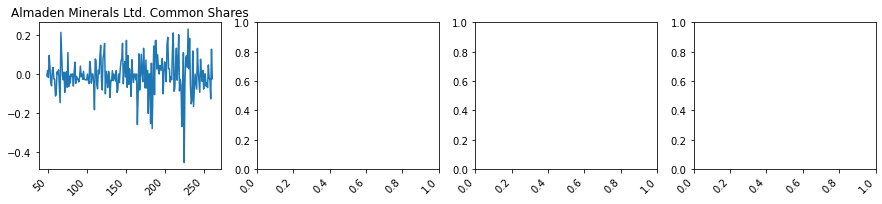

                          Cluster number: 17


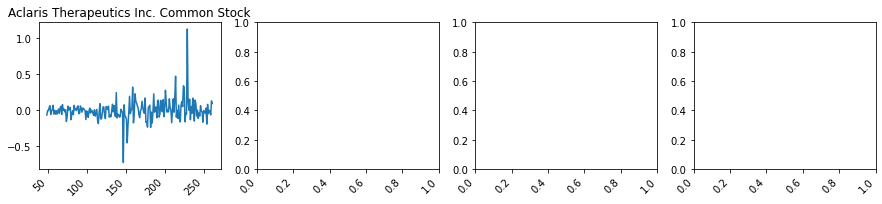

                          Cluster number: 18


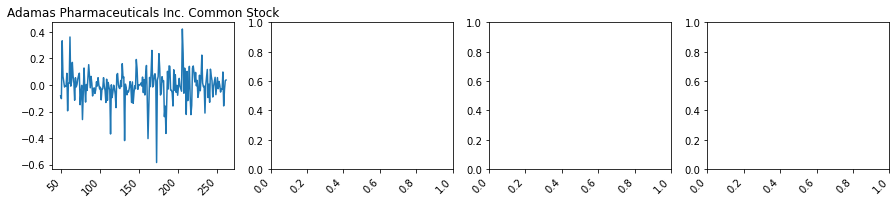

                          Cluster number: 19


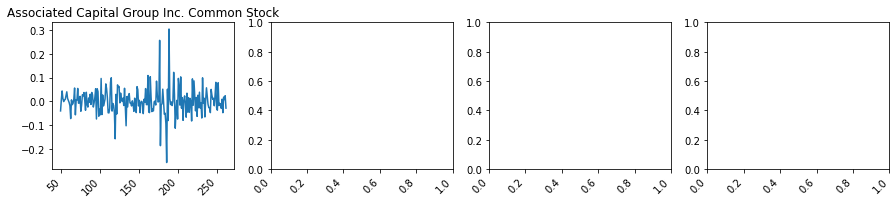

                          Cluster number: 20


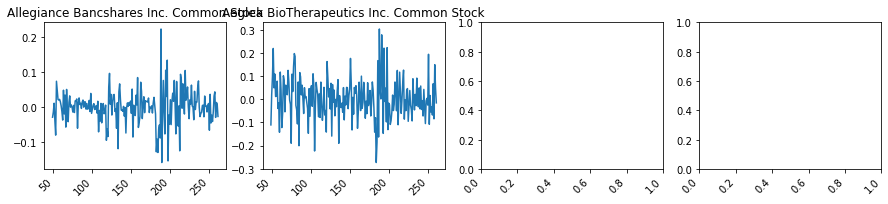

                          Cluster number: 21


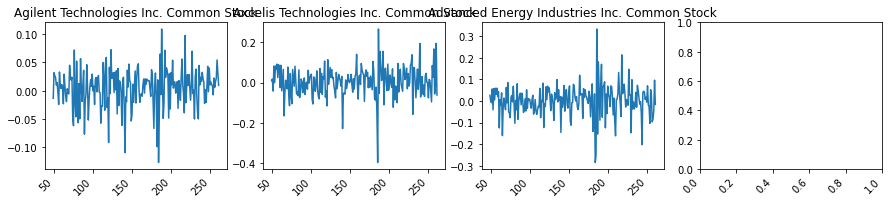

In [77]:
import matplotlib.pyplot as plt
for cluster in range(22):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_week[clusters_itog[cluster]].T)

На недельных данных результат хуже, однако общие тендеции тоже можно проследить. Например, кластер 6 содержит активы с характерным провалом и последующим послековидным пиком. Данных неочень много, поэтому kmeans достаточно неустойчив, хотя я и использую встроенный подбор оптимального числа начальных инициализаций. Если прогнать алгоритм несколько раз, то результат может поменяться и соседние кластеры обменяются активами.

In [78]:
df=pd.DataFrame()
df['skew']=df_log_returns_week.skew()
df['kurtosis']=df_log_returns_week.kurtosis()
df['Shares']=df.index
df['claster_numb'] = df['Shares'].apply(get_key)

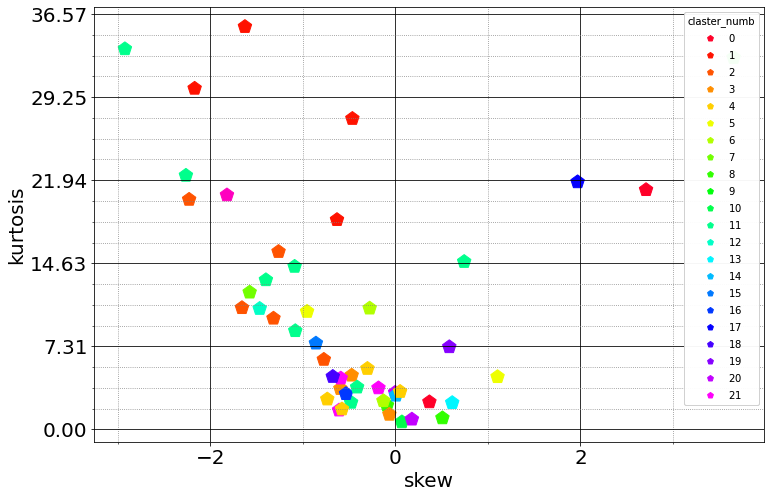

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
#  Устанавливаем интервал основных и
#  вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(max(abs(df['skew']/0.5))))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(max(abs(df['skew']/2))))

ax.tick_params(
    axis='both',  # Применяем параметры к обеим осям
    which='major',  # Применяем параметры к основным делениям
    labelsize=20,  # Длинна делений
)  # Ширина делений
#  Добавляем линии основной сетки:
ax.grid(which='major', color='k')
x = np.array(df['skew'])
y = np.array(df['kurtosis'])
scatter =ax.scatter(x,
           y,
           marker="p",
           c=df.claster_numb,
           s=200,
           cmap="gist_rainbow")
legend1 = ax.legend(*scatter.legend_elements(num=range(0,max(clusters_itog.keys()))),
                    loc="best", title="claster_numb")
ax.add_artist(legend1)
#  Включаем видимость вспомогательных делений:
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor', color='gray', linestyle=':')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.xlabel('skew', fontsize=20)

plt.ylabel('kurtosis', fontsize=20)

plt.show()

# DTW

# Часовые данные

In [80]:
df_log_returns_hours=df_log_returns_hours.drop(['cluster'],axis=1)

KeyError: "['cluster'] not found in axis"

In [ ]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
distortions = []
silhouette = []
K = range(2, len(df_log_returns_hours.columns)//2)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(df_log_returns_hours.T)
    distortions.append(kmeanModel.inertia_)

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')


plt.show()

In [ ]:
n_clusters = 5
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(df_log_returns_hours.T)

In [ ]:
pred = ts_kmeans_dtw.predict(df_log_returns_hours.T)

clusters = {
                    i: df_log_returns_hours.columns[np.where(pred == i)[0]].tolist()
                    for i in np.unique(pred)
                }

In [ ]:
clusters

In [ ]:
for cluster in range(5):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_hours[clusters[cluster]].T)

# Дневные данные

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
distortions = []
silhouette = []
K = range(2, len(df_log_returns_days.columns)//2)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(df_log_returns_days.T)
    distortions.append(kmeanModel.inertia_)

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')


plt.show()

In [ ]:
n_clusters = 23
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(df_log_returns_days.T)

In [ ]:
pred = ts_kmeans_dtw.predict(df_log_returns_days.T)

clusters = {
                    i: df_log_returns_days.columns[np.where(pred == i)[0]].tolist()
                    for i in np.unique(pred)
                }

In [ ]:
clusters

In [ ]:
for cluster in range(23):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_days[clusters[cluster]].T)

# Недельные данные

In [ ]:
df_log_returns_week=df_log_returns_week.drop(['skew','kurtosis'],axis=1)

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
distortions = []
K = range(2, len(df_log_returns_week.columns)//2)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(df_log_returns_week.T)
    distortions.append(kmeanModel.inertia_)

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')


plt.show()

In [ ]:
n_clusters = 23
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(df_log_returns_week.T)

In [ ]:
pred = ts_kmeans_dtw.predict(df_log_returns_week.T)

clusters = {
                    i: df_log_returns_week.columns[np.where(pred == i)[0]].tolist()
                    for i in np.unique(pred)
                }

In [ ]:
clusters

In [ ]:
for cluster in range(23):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(df_log_returns_week[clusters[cluster]].T)

На мой взгляд, применение DTW для задачи кластеризации активов не имеет смысла, так как при этом теряется временная структура активов и следовательно основная задача кластеризации на финансовых активах: найти активы, которые будут себя одинаково/по-разному вести в условиях кризиса. Оптимальным является использования алгоритма kmeans, оторый показывает хорошие результаты. Для улучшения устойчивости можно применить различные ухищрения, как , например, в алгоритме ONC.DTW же лучше оставить для применения в нефинансовых сферах.